In [1]:
# Set seed- initializes random number generation to be same on different computers

import numpy.random as nr
nr.seed(12345)

In [2]:
# Generate normally distrubuted random sample w/ 50 responses from a population, w/ mean= 10, & std dev= 2.
 # normal(mean, std, n)

nr.normal(10, 2, 50)

array([ 9.59058468, 10.95788668,  8.96112257,  8.88853939, 13.93156115,
       12.78681167, 10.18581575, 10.56349231, 11.53804514, 12.49286947,
       12.01437872,  7.40755778, 10.54998327, 10.45782576, 12.70583367,
       11.77285868,  5.99672538,  9.25631493, 13.33805062,  9.12286053,
        8.92051711, 10.95397002, 16.49788784,  7.95754495,  8.84582539,
       10.24824255, 10.60522712, 11.04754414, 10.00188056, 12.68761959,
        8.57291203,  8.33769292,  5.25953669,  6.27847842,  8.2784852 ,
       11.12029059,  7.46813102, 10.23965425,  7.8729751 , 10.66576543,
        5.28116239,  9.60091409,  6.91600894,  8.05852818,  7.3859395 ,
       10.57269949, 10.75596822,  8.49222693, 10.6625713 , 12.69948443])

In [3]:
# Above- Numpy array w/ normally distributed values returned.

# Below- Generate bionomial distribution random sample w/ 50 responses from a population, w/ 30% people liking product (1) & 70% not not (0).
 # binomial(n, prob, size=1)
    # prob argument- represents likelihood of getting 1 as opposed to 0.
    # size argument- changes nature of distribution
    
nr.seed(3344)
nr.binomial(1, 0.3, 50)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1])

In [4]:
# Above- 1= someone who likes product & 0= someone who does not like product

# Below- This time I will save the result.

nr.seed(3344)
sample1 = nr.binomial(1, 0.3, 50)

In [5]:
# Examine how well our sample did. We specified that parameter (population value= 30%).
 # How close did we get?
    
from scipy import stats
print(stats.itemfreq(sample1))

[[ 0 37]
 [ 1 13]]


In [6]:
# Above- There are 13 likes & 37 dislikes.

# Below- Convert that to percentages.

13.0/(13.0 + 37.0)

0.26

In [7]:
# Above- Our sample underestimate # of people who like product w/ 26% instead of 30%.

# Below- We can also trick the math into returning a proportion by using mean() from Numpy.

import numpy as np
np.mean(sample1)

0.26

In [8]:
# Let's try random sampling several different times to see if there is a difference.

print(np.mean(nr.binomial(1, 0.3, 50)))
print(np.mean(nr.binomial(1, 0.3, 50)))
print(np.mean(nr.binomial(1, 0.3, 50)))
print(np.mean(nr.binomial(1, 0.3, 50)))
print(np.mean(nr.binomial(1, 0.3, 50)))
print(np.mean(nr.binomial(1, 0.3, 50)))

0.3
0.28
0.3
0.28
0.4
0.26


In [10]:
# Above- Samples vary quite a bit. 

# Below- Let's try this again w/ 100 times by using a list comprehension.

results = [np.mean(nr.binomial(1, 0.3, 50)) for _ in range(100)]
print(results)

[0.28, 0.34, 0.2, 0.34, 0.34, 0.26, 0.3, 0.2, 0.18, 0.28, 0.24, 0.34, 0.28, 0.28, 0.22, 0.22, 0.34, 0.26, 0.26, 0.28, 0.24, 0.24, 0.36, 0.22, 0.22, 0.24, 0.38, 0.24, 0.18, 0.3, 0.28, 0.3, 0.24, 0.3, 0.34, 0.26, 0.38, 0.24, 0.28, 0.22, 0.36, 0.24, 0.38, 0.28, 0.24, 0.38, 0.26, 0.3, 0.3, 0.44, 0.26, 0.3, 0.34, 0.32, 0.32, 0.38, 0.36, 0.34, 0.18, 0.22, 0.32, 0.3, 0.32, 0.32, 0.24, 0.32, 0.32, 0.22, 0.24, 0.14, 0.26, 0.38, 0.38, 0.28, 0.18, 0.34, 0.24, 0.32, 0.24, 0.34, 0.36, 0.32, 0.36, 0.28, 0.24, 0.26, 0.14, 0.52, 0.28, 0.32, 0.22, 0.24, 0.32, 0.22, 0.26, 0.24, 0.32, 0.28, 0.26, 0.28]


Text(0.5,1,'Histogram of Results')

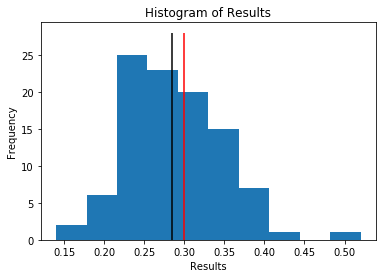

In [11]:
# Above- Again considerable variance in these results.

# Below- Let's take a look them in a histogram.

%matplotlib inline

sample_mean = np.mean(results)
import matplotlib.pyplot as plt
plt.hist(results)
plt.vlines(0.3, 0.0, 28.0, color= 'red')
plt.vlines(sample_mean, 0.0, 28.0, color= 'black')
plt.xlabel('Results')
plt.ylabel('Frequency')
plt.title('Histogram of Results')

In [13]:
# Above- On average, random samples are trustworthy, tending toward 30%.
 # However, individual samples are less trustworthy. Some results are nearly as large as 135% or as low as 50%.
    
# Below- We can also subtract 0.30 from each acore to re-score them as the degree of error in each sample.

results_error = [round(x - 0.3, 2) for x in results]
print(results_error)

[-0.02, 0.04, -0.1, 0.04, 0.04, -0.04, 0.0, -0.1, -0.12, -0.02, -0.06, 0.04, -0.02, -0.02, -0.08, -0.08, 0.04, -0.04, -0.04, -0.02, -0.06, -0.06, 0.06, -0.08, -0.08, -0.06, 0.08, -0.06, -0.12, 0.0, -0.02, 0.0, -0.06, 0.0, 0.04, -0.04, 0.08, -0.06, -0.02, -0.08, 0.06, -0.06, 0.08, -0.02, -0.06, 0.08, -0.04, 0.0, 0.0, 0.14, -0.04, 0.0, 0.04, 0.02, 0.02, 0.08, 0.06, 0.04, -0.12, -0.08, 0.02, 0.0, 0.02, 0.02, -0.06, 0.02, 0.02, -0.08, -0.06, -0.16, -0.04, 0.08, 0.08, -0.02, -0.12, 0.04, -0.06, 0.02, -0.06, 0.04, 0.06, 0.02, 0.06, -0.02, -0.06, -0.04, -0.16, 0.22, -0.02, 0.02, -0.08, -0.06, 0.02, -0.08, -0.04, -0.06, 0.02, -0.02, -0.04, -0.02]


In [14]:
# Above- Most sample scores are within ~5% of true population value. Depending on what we are going to do w/ data, that could be unacceptably large.
 # Sampling error- property of sample to "mis-estimate" the population. It is a big problem, leading to many a bad decision.
 # We want to estimate degree to which individual samples tend to "mis-estimate" the population (results-error)

# Below- We can quantify this by taking the standard deviation of these errors (Standard error).
 # This provides a single number & shows how far "off" our samples tend to be, on average.
    
np.std(results_error)

0.06284075110945125

0.016947764887851068


Text(0.5,1,'Histogram of results')

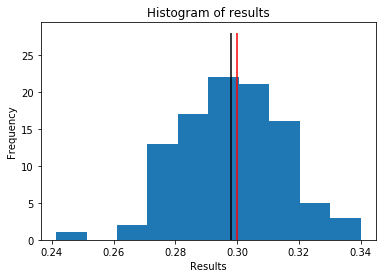

In [15]:
# Above- Typical sample will be off by only 1.7% from population value.

# Below- Run a similiar loop as done before & see in action w/ larger set of responses.

results = [np.mean(nr.binomial(1, 0.3, 700)) for _ in range(100)]

print(np.std(results))

sample_mean = np.mean(results)
import matplotlib.pyplot as plt
plt.hist(results)
plt.vlines(0.3, 0.0, 28.0, color = 'red')
plt.vlines(sample_mean, 0.0, 28.0, color = 'black')
plt.xlabel('Results') 
plt.ylabel('Frequency')
plt.title('Histogram of results')

In [ ]:
# Above- Most results between 82% & 112%, w/ typical result being "off" by only 1.7% ... exactly as our standard error equation predicted.

# Summary-
 # Every data situation has a standard error. 
 # Samples (& the statistics they produce) are flawed estimates of population.
  # However, they become more & more accurate as the sample sizes they are based on increase.
 # This gives us concept of statistical power
  # Large samples will produce results strong enough that we can make meaningful statements about population ("good power"),
   # where samll samples contain so much error that we cannot say anything meaningful about population ("weak power").   